In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']), delimiter = ";")

In [6]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [7]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [8]:
#Let us divide the dataset into some groups
df_fs = df.drop(columns = ['Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)','Target'])
df_emt = df.drop(columns = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)','Target'])

In [9]:
from sklearn.utils import shuffle
target = df["Target"]
shuffled_target = shuffle(target, random_state = 2)

In [10]:
group1_data = pd.concat([df_fs, shuffled_target], axis = 1)
group2_data = pd.concat([df_emt, shuffled_target], axis = 1)

In [12]:

#group1_data contains information about the student at the end of 1st semester
#group2_data contains information about the student at the enrollment stage
#df itself will be our base dataset, containing the information of the student in the first and second semester

Checking the data distribution in each datasets

In [13]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Let us see the data distribution

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


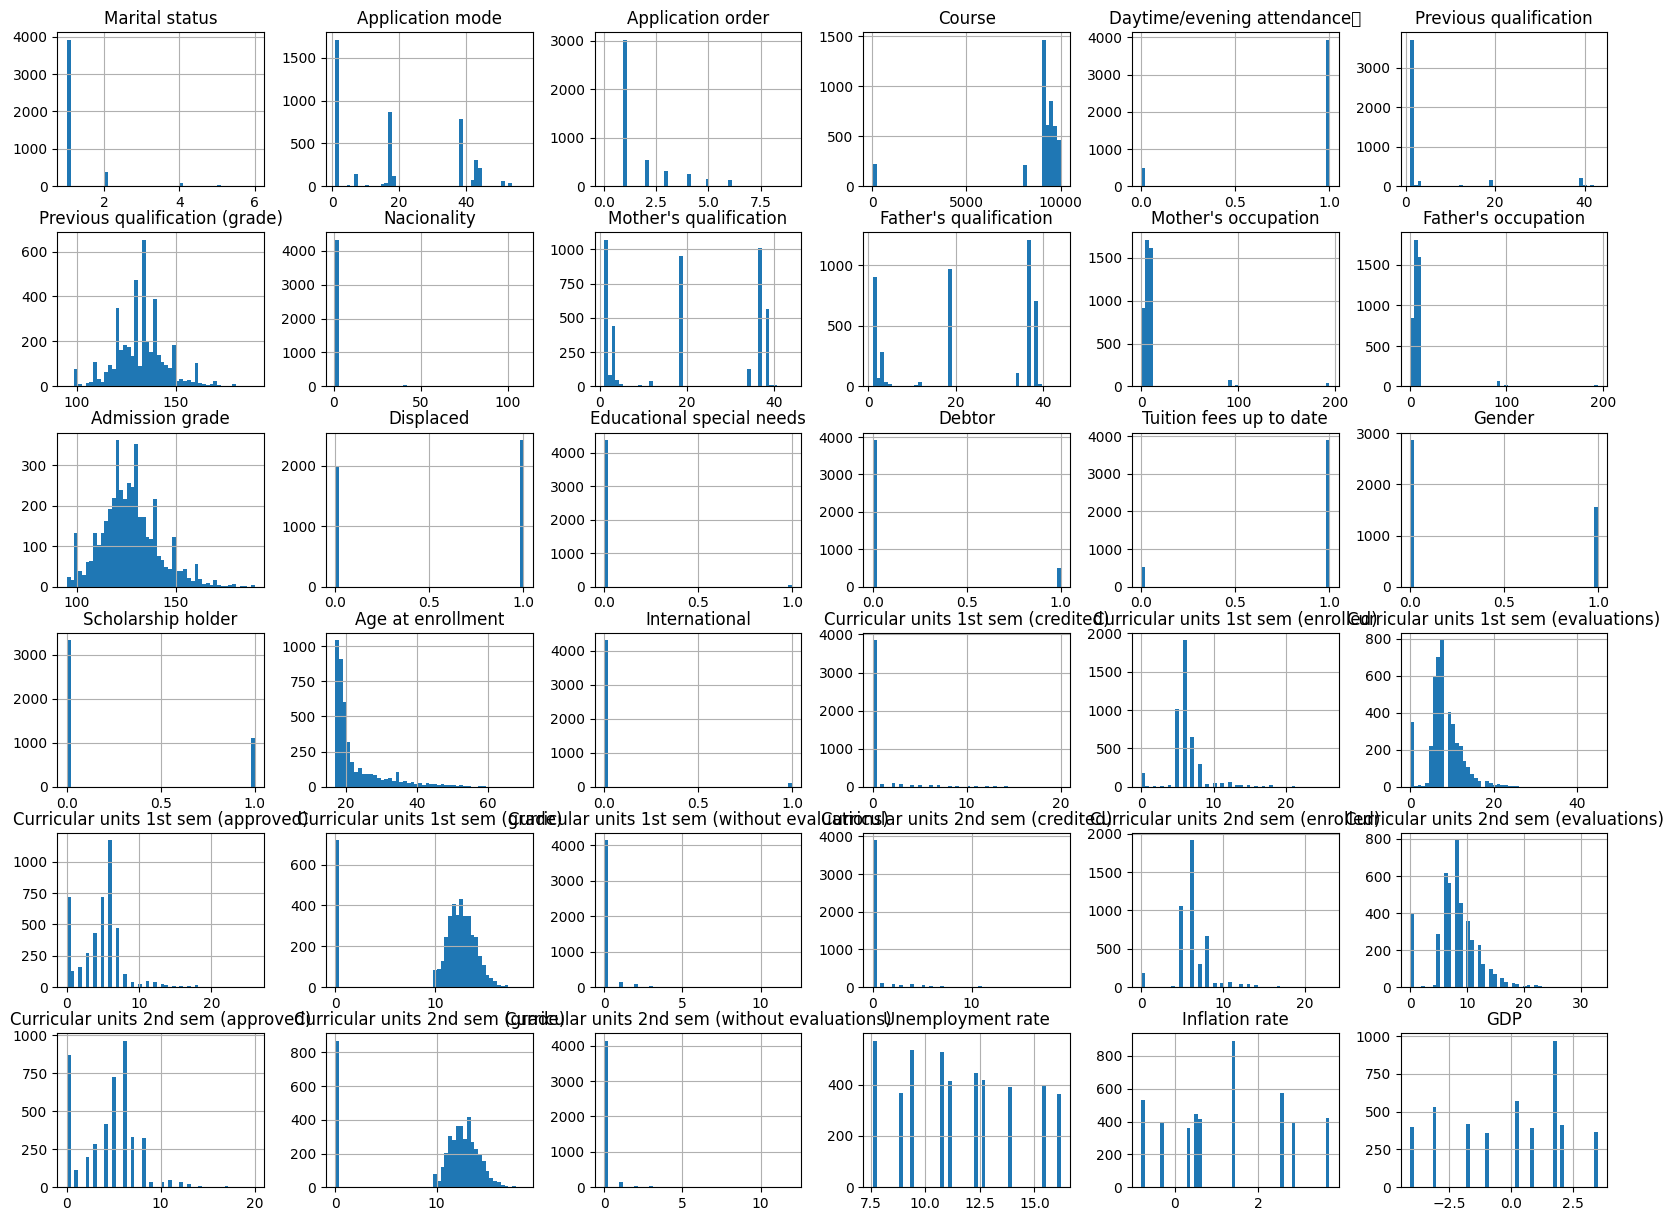

In [14]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

#Feature Engineering

Some preprocessing

Since we are considering the best approach to predict early dropout risk. The earliet stage would be at the end of the first session (1st + 2nd semesters) given the data we have Our main goal would be to develop a system that would allow quick identification of students especially those that are struggling with difficulties in their studies who are prone to dropping out. This is a classification task and the target variable ["Target"] has three values which are

Graduate - Academic success, finishing at the appropriate time
Dropout - Failure
Enrolled - most likely extension of academic studies

So, let us check the value counts of this feature

In [15]:
df["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

It is imbalanced

In [16]:
#converting the target feature into category
cat_attribs = ["Target"]
df["Target"] = df[cat_attribs].astype("category")

In [17]:
df["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

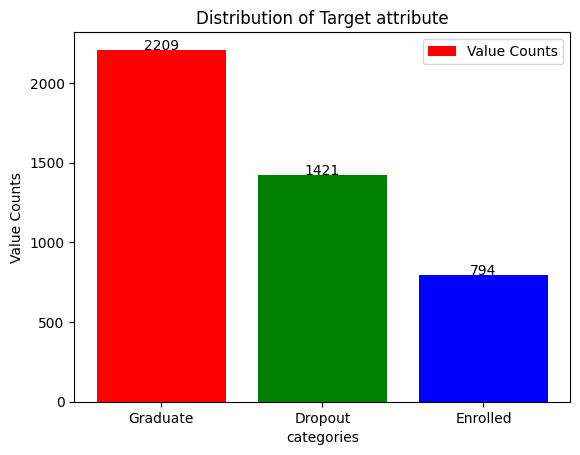

In [18]:
categories = ["Graduate", "Dropout", "Enrolled"]
value_counts = [2209, 1421, 794]
#create a bar plot
colors = ["red", "green", "blue"]
plt.bar(categories, value_counts, color = colors)
plt.xlabel("categories")
plt.ylabel("Value Counts")
plt.title("Distribution of Target attribute")
plt.legend(["Value Counts"])
for i, v in enumerate(value_counts):
  plt.text(i, v + i, str(v), ha = "center")
plt.show()

This visualization reveals the imbalanceness of the target attribute

In [19]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Let us investigate some features combination using groupby function

In [20]:
grouped = df["Gender"].groupby(df["Target"])

In [21]:
grouped.value_counts()

Target    Gender
Dropout   0          720
          1          701
Enrolled  0          487
          1          307
Graduate  0         1661
          1          548
Name: Gender, dtype: int64

In [22]:
grouped = df["Scholarship holder"].groupby(df["Target"])

In [23]:
grouped.value_counts()
# 0 signifies no scholarship holder
#1 signifies yes scholarship holder

Target    Scholarship holder
Dropout   0                     1287
          1                      134
Enrolled  0                      664
          1                      130
Graduate  0                     1374
          1                      835
Name: Scholarship holder, dtype: int64

The dataset is highly imbalanced

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   int64   
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

In [25]:
from imblearn.over_sampling import SMOTE
X = df.drop("Target", axis = 1)
y = df["Target"]
#using smote
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [26]:
X_resampled

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.000000,1,19,12,...,0,0,0,0,0,0.000000,0,10.800000,1.400000,1.740000
1,1,15,1,9254,1,1,160.000000,1,1,3,...,0,0,6,6,6,13.666667,0,13.900000,-0.300000,0.790000
2,1,1,5,9070,1,1,122.000000,1,37,37,...,0,0,6,0,0,0.000000,0,10.800000,1.400000,1.740000
3,1,17,2,9773,1,1,122.000000,1,38,37,...,0,0,6,10,5,12.400000,0,9.400000,-0.800000,-3.120000
4,2,39,1,8014,0,1,100.000000,1,37,38,...,0,0,6,6,6,13.000000,0,13.900000,-0.300000,0.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1,1,1,9853,1,1,127.572544,1,4,1,...,0,0,6,9,4,12.705014,0,10.800000,1.400000,1.740000
6623,1,17,4,9500,1,1,136.446258,1,1,1,...,0,0,8,8,7,12.775719,0,13.556680,-0.111728,0.895211
6624,1,1,1,9147,1,1,129.240418,1,37,37,...,0,0,5,9,3,13.250375,0,10.030664,1.688501,1.398607
6625,2,39,1,9991,0,39,140.000000,1,37,19,...,0,0,5,7,5,11.808354,0,12.660616,3.646295,-1.716947


Checking for multicollinearity

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


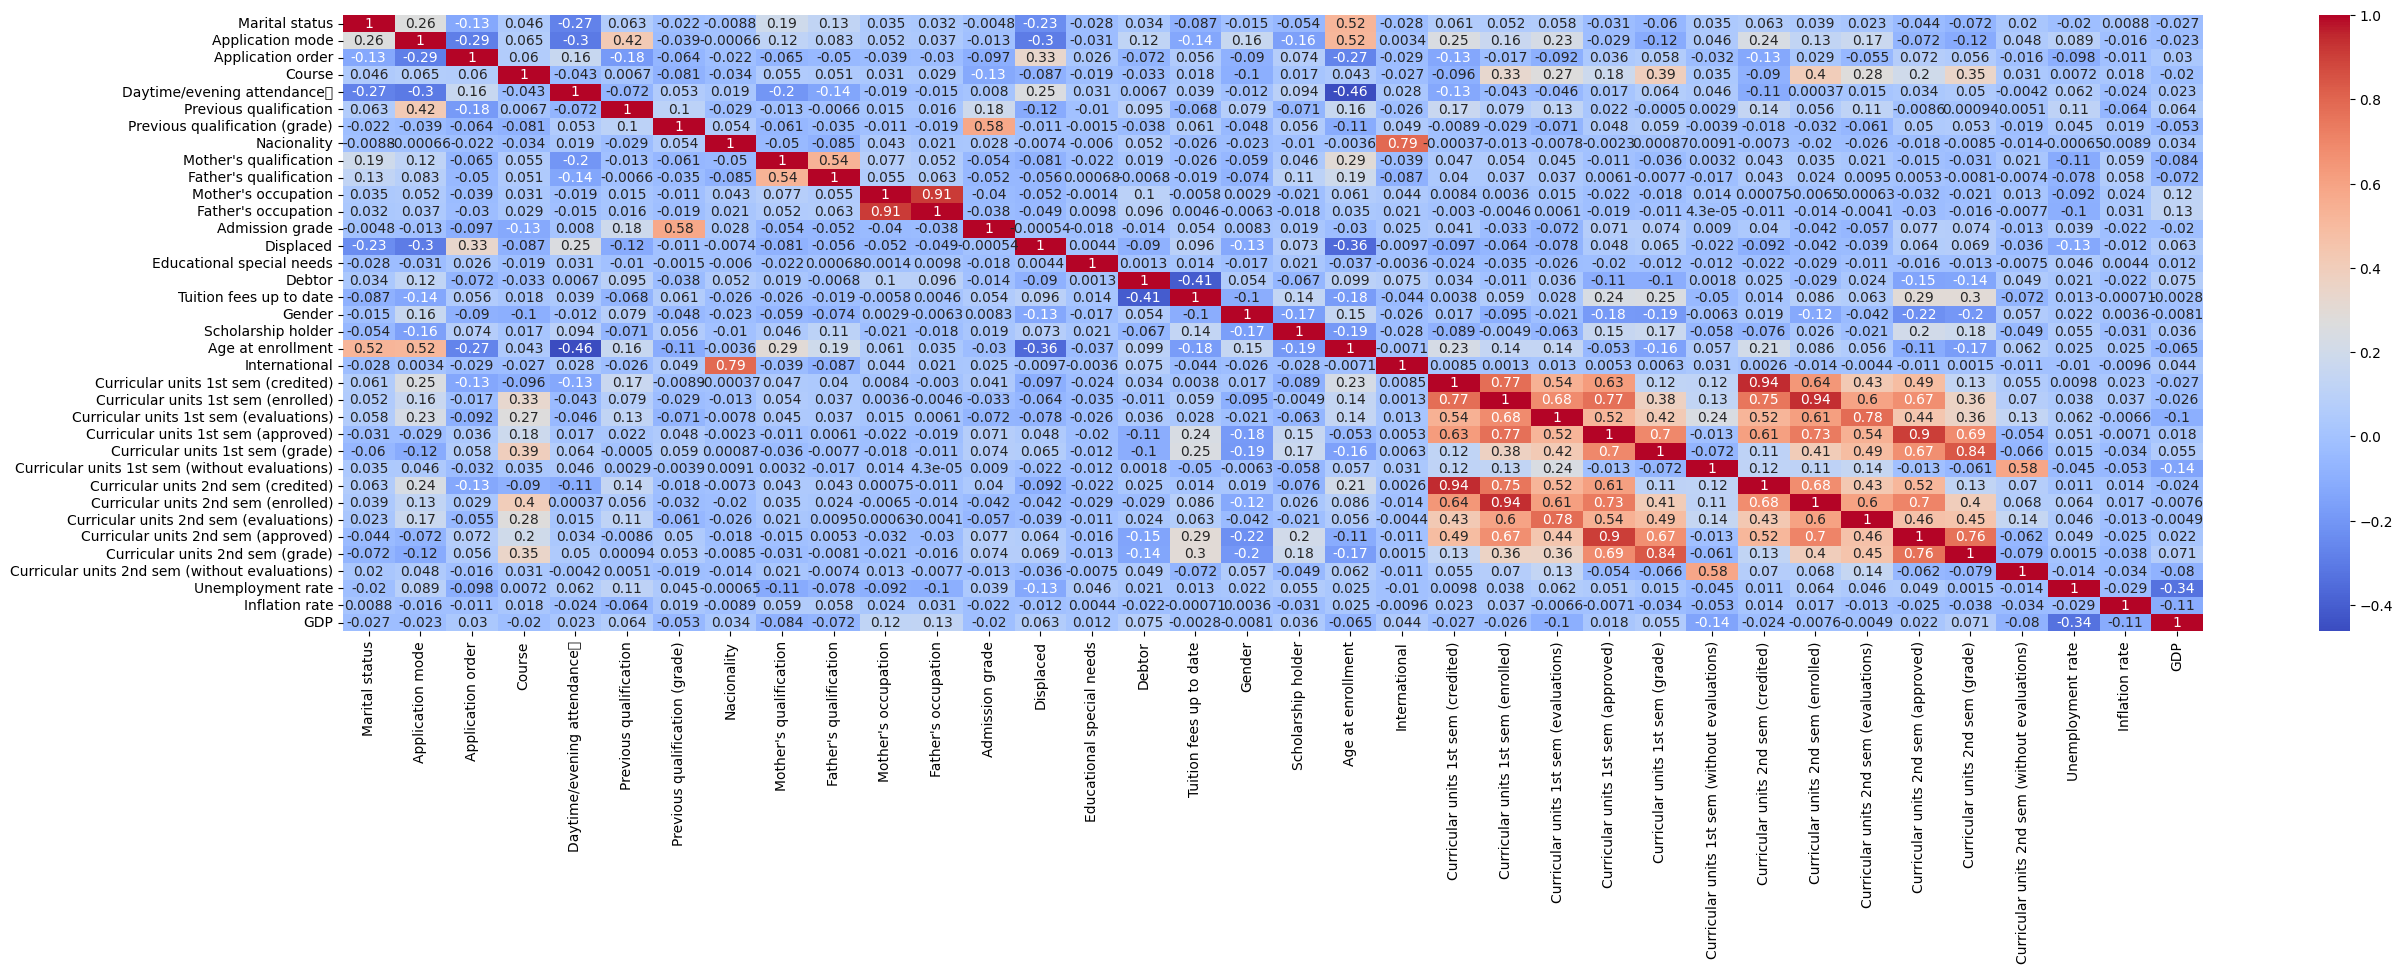

In [27]:
predictors = df.drop("Target", axis = 1)
corr = predictors.corr()
#import statsmodels.graphics.api as sm
plt.figure(figsize = (30, 8))
import seaborn as sns
#sm.plot_corr(corr, xnames = list(corr.columns))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

Multicolinearity exists with pearson correlation coefficient greater than 0.7. The correlation is strongest between features in the same group such Nationality and International and Mother's Occupation and father's occupation



In [28]:

#Let us know those features that are highly not correlated at a threshold of 0.7
high_correlation_features = set()
for i in range(len(corr.columns)):
  for j in range(i):
    if abs(corr.iloc[i,j]) >= 0.5:
      feature_i = corr.columns[i]
      feature_j = corr.columns[j]
      high_correlation_features.add(feature_i)
#Remove the features with high collinearity
data_without_collinear_features = predictors.drop(high_correlation_features, axis = 1)
#Printing the remaining features
remaining_features = data_without_collinear_features.columns
print("Remaining Features:", remaining_features)

Remaining Features: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Mother's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')


In [29]:
#Correlated features with their pearson correlation coefficient
correlation_threshold = 0.5
#Finding highly correlated features
highly_correlated_features = []
for i in range(len(corr.columns)):
  for j in range(i+1, len(corr.columns)):
    if abs(corr.iloc[i,j]) >= correlation_threshold:
      feature_i = corr.columns[i]
      feature_j = corr.columns[j]
      highly_correlated_features.append((feature_i, feature_j, corr.iloc[i,j]))
#print
for feature_i, feature_j, correlation in highly_correlated_features:
  print(f"{feature_i} - {feature_j}: {correlation}")

Marital status - Age at enrollment: 0.5227171684130265
Application mode - Age at enrollment: 0.5162427253595344
Previous qualification (grade) - Admission grade: 0.5804441978785279
Nacionality - International: 0.7909349101784291
Mother's qualification - Father's qualification: 0.5351396811158693
Mother's occupation - Father's occupation: 0.910472107644332
Curricular units 1st sem (credited) - Curricular units 1st sem (enrolled): 0.7743441891168912
Curricular units 1st sem (credited) - Curricular units 1st sem (evaluations): 0.542919440962828
Curricular units 1st sem (credited) - Curricular units 1st sem (approved): 0.6283944209937343
Curricular units 1st sem (credited) - Curricular units 2nd sem (credited): 0.9448110366582713
Curricular units 1st sem (credited) - Curricular units 2nd sem (enrolled): 0.6448259027030505
Curricular units 1st sem (enrolled) - Curricular units 1st sem (evaluations): 0.6802196375654453
Curricular units 1st sem (enrolled) - Curricular units 1st sem (approved)

#Feature Importance using permutation feature importance
Permutation feature importance is a technique used to evaluate the importance
of each feature in a predictive model. It works by permuting the values of a single feature while keeping the other features unchanged, and then measuring the resulting decrease in model performance. The greater the decrease in performace, the more important the feature is considered.


Selected Features: ['Application mode', 'Course', "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate']
Marital status: 0.0004860380315928503
Application mode: 0.00844523238749203
Application order: -0.00022444063873199304
Course: 0.017515426217888798
Daytime/evening attendance	: 0.003268352286396092
Previous qualification: 0.00027385555940107054
Previous qualification (grade): 0.004832194082051366
Nacionality: -0.00026028891110594363
Mother's qualification: 0.0030454869935969465
Father's qualification: 0.005209091240753705
Mother's occupation: 0.0082581

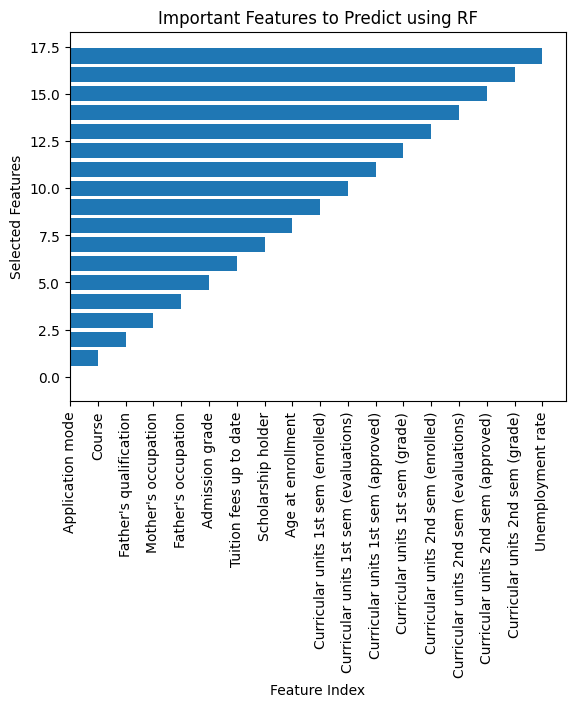

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score  #Since our dataset is highly imbalanced,
#we need to use an error metric that is quite robust to this effect

X = df.drop("Target", axis = 1)
y = df.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a randomforest classifier
model = RandomForestClassifier()
#fitting
model.fit(X_train, y_train)
#using f1 score
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred,average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)
#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = df[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using RF")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

In [31]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


Learning rate set to 0.084395
0:	learn: 1.0298620	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9802399	total: 65.5ms	remaining: 32.7s
2:	learn: 0.9363665	total: 73.6ms	remaining: 24.5s
3:	learn: 0.8990005	total: 81.7ms	remaining: 20.4s
4:	learn: 0.8640757	total: 89.7ms	remaining: 17.8s
5:	learn: 0.8337294	total: 103ms	remaining: 17s
6:	learn: 0.8101160	total: 112ms	remaining: 15.9s
7:	learn: 0.7872525	total: 120ms	remaining: 14.9s
8:	learn: 0.7665411	total: 128ms	remaining: 14.1s
9:	learn: 0.7472077	total: 136ms	remaining: 13.5s
10:	learn: 0.7308264	total: 144ms	remaining: 13s
11:	learn: 0.7186101	total: 151ms	remaining: 12.5s
12:	learn: 0.7081914	total: 159ms	remaining: 12.1s
13:	learn: 0.6965181	total: 167ms	remaining: 11.7s
14:	learn: 0.6850763	total: 174ms	remaining: 11.4s
15:	learn: 0.6735922	total: 182ms	remaining: 11.2s
16:	learn: 0.6653678	total: 190ms	remaining: 11s
17:	learn: 0.6565862	total: 202ms	remaining: 11s
18:	learn: 0.6489994	total: 209ms	remaining: 10.8s
19:	learn: 0.6

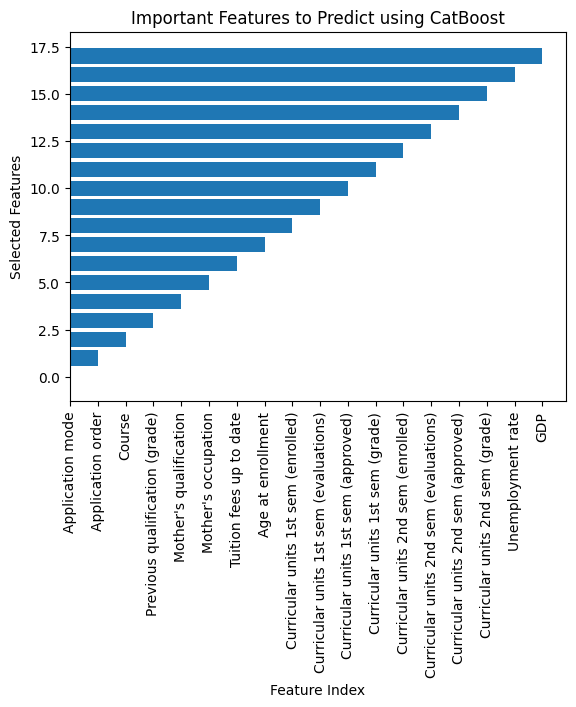

In [32]:
#Using boosting methods
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.inspection import permutation_importance

X = df.drop("Target", axis = 1)
y = df.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a catboostclassifier
model = CatBoostClassifier()
#fitting
model.fit(X_train, y_train)
#using the F1 metrics
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred, average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)
#Feature names

#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = df[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using CatBoost")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

Selected Features: ['Application mode', 'Course', 'Previous qualification (grade)', "Father's qualification", "Mother's occupation", 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate']
Marital status: 0.0005120930207532682
Application mode: 0.009565089260905612
Application order: 0.0034110893401368635
Course: 0.017490958634377364
Daytime/evening attendance	: -0.00042041207775384004
Previous qualification: 0.0033724216519364194
Previous qualification (grade): 0.010878455667939735
Nacionality: -2.3982332296212937e-05
Mother's qualification: 0.0015515311052613722
Father's qualification: 0.006757185670558508
Mother's occupation: 0.012299407969702202
Father's oc

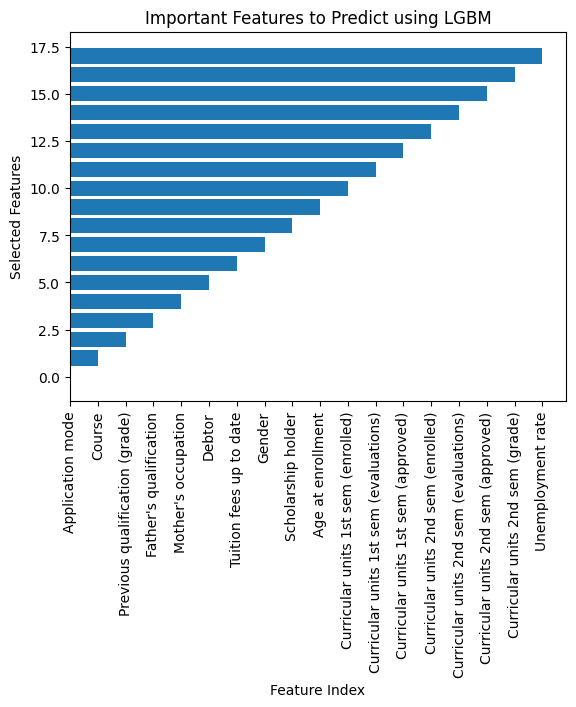

In [33]:
#Using LightGradientBoostingMachine
import lightgbm as lgb
#from sklearn.model_selection import train_test_split
#from sklearn.inspection import permutation_importance
X = df.drop("Target", axis = 1)
y = df.Target
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a LGBMclassifier
model = lgb.LGBMClassifier()
#fitting
model.fit(X_train, y_train)
#using the F1 metrics
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred, average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)

#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = df[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using LGBM")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

In [34]:
#for the purpose of using XGBoost, let us encoder the Target values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([0, 2, 0, ..., 0, 2, 2])

Selected Features: ['Application mode', 'Course', 'Previous qualification', "Mother's occupation", 'Admission grade', 'Tuition fees up to date', 'Gender', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate']
Marital status: -0.00023512830669480955
Application mode: 0.012480948136383629
Application order: 0.0022072433765470854
Course: 0.011374911876465988
Daytime/evening attendance	: 0.0005961274489160395
Previous qualification: 0.007504495970366698
Previous qualification (grade): 0.002072999800298192
Nacionality: 0.00210879945898792
Mother's qualification: 0.0026375265204904076
Father's qualification: 0.0002903519803720389
Mother's occupation: 0.014488

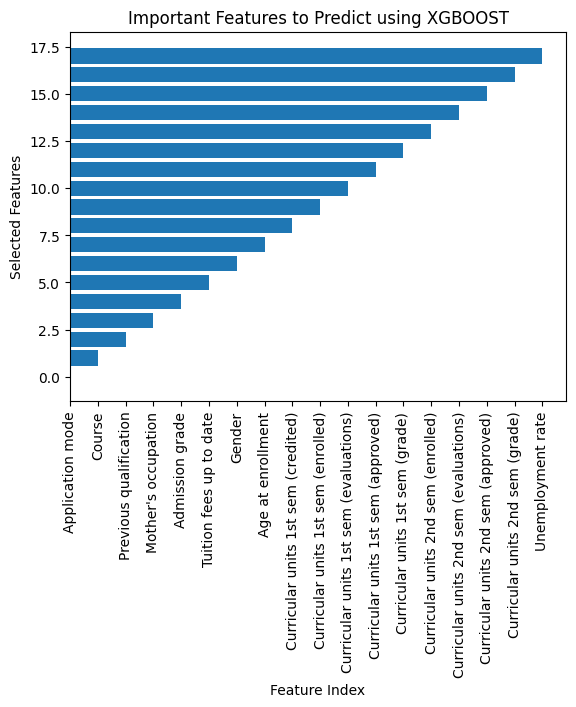

In [35]:
#using another general boosting technique

import xgboost as xgb
X = df.drop("Target", axis = 1)
y = y_encoded
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Creating a XGclassifier
model = xgb.XGBClassifier()
#fitting
model.fit(X_train, y_train)
#using the F1 metrics
def f1_scorer(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred, average = "weighted")
#calculating permutation features
result = permutation_importance(model, X_test, y_test, scoring = f1_scorer, n_repeats = 10, random_state = 42)
#Get the feature importance scores
importance_scores = result.importances_mean
#setting threshold
threshold = np.percentile(importance_scores, 50)
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]
X_selected = X[selected_features]
print("Selected Features:", selected_features)

#Feature names
feature_names = X.columns
#creating a list of (feature, importance) tuples
feature_importance_list = list(zip(feature_names, importance_scores))
#sort the list in descending order based on importance scores
feature_importance_list.sort(key = lambda x: x[1], reverse = True)
#printing the feature importance scores
for feature_name, importance_scores in zip(feature_names, importance_scores):
  print(f"{feature_name}: {importance_scores}")

#visualizing the feature importance
subset_data = df[selected_features]
plt.barh(range(len(selected_features)), selected_features)
plt.xlabel("Feature Index")
plt.ylabel("Selected Features")
plt.title("Important Features to Predict using XGBOOST")
plt.xticks(range(len(selected_features)), selected_features, rotation = "vertical")
plt.show()

Features that have are important include:
For XGBOOST - Selected Features: ['Application mode', 'Course', 'Previous qualification', "Mother's occupation", 'Admission grade',
'Tuition fees up to date', 'Gender', 'Age at enrollment', 'Curricular units 1st sem (credited)',
'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate']

For LIGHTGBM: Selected Features: ['Application mode', 'Course', 'Previous qualification (grade)', "Father's qualification", "Mother's occupation", 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate']

For CATBOOST: Selected Features: ['Application mode', 'Application order', 'Course', 'Previous qualification (grade)', "Mother's qualification", "Mother's occupation", 'Tuition fees up to date', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'GDP']

For RANDOMFOREST CLASSIFIER: Selected Features: ['Application mode', 'Course', 'Previous qualification (grade)', "Father's qualification", "Father's occupation", 'Debtor', 'Tuition fees up to date', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Inflation rate']


In [36]:
selected_features = df[['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Tuition fees up to date',
                        'Course','Curricular units 2nd sem (enrolled)', 'Age at enrollment', 'Curricular units 1st sem (evaluations)',
                        'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (grade)','Curricular units 1st sem (enrolled)']]
selected_features.columns

#selected_features = df[['Tuition fees up to date','Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
#'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)',
#'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']]

Index(['Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (approved)', 'Tuition fees up to date',
       'Course', 'Curricular units 2nd sem (enrolled)', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 1st sem (enrolled)'],
      dtype='object')

#Model Building

For the model building, we will be examining two classification of models that can handle imbalanced dataset. The first ones are those model that can imbalanced datasets at the data level while the other are those that can handle imabalanced dataset at the algorithm level. For this purpose, we have:
#Data Level
1. SMOTE + RF (SMOTE + RANDOMFOREST CLASSIFIER)
2. SVMSMOTE (SUPPORT VECTOR MACHINE + SMOTE)
3. SVMSMOTE + RF (SUPPORT VECTOR MACHINE + RANDOMFOREST CLASSIFIER)

#Algorithm level
1. BALANCED RANDOMFOREST CLASSIFIER (BRF)
2. EASY ENSEMBLE CLASSIFIER(EEC)

In [37]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [38]:
X = selected_features
Y = y_encoded

#standard the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_scaled

array([[-1.52125739, -1.47152688,  0.36813532, ..., -2.04262989,
        -1.96348862, -2.52855964],
       [ 0.41804989,  0.51890369, -2.71639244, ..., -0.52268237,
         0.65956171, -0.10910515],
       [-1.52125739, -1.47152688, -2.71639244, ..., -2.04262989,
        -1.96348862, -0.10910515],
       ...,
       [ 0.74126777, -1.13978845,  0.36813532, ...,  0.23729138,
         0.62757329,  0.29413727],
       [ 0.09483201,  0.18716526,  0.36813532, ..., -0.52268237,
         0.33967752, -0.51234756],
       [ 0.41804989,  0.51890369,  0.36813532, ..., -0.52268237,
         0.53160803, -0.10910515]])

In [40]:
check = pd.DataFrame(X_scaled)

In [41]:
check[2] = check[2].astype(int)
check[5] = check[5].astype(int)

In [42]:
check.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.521257,-1.471527,0,-4.209520,-2.838337,0,-1.986068,-2.042630,-1.963489,-2.528560
1,0.418050,0.518904,-2,0.192580,-0.105726,0,-0.550192,-0.522682,0.659562,-0.109105
2,-1.521257,-1.471527,-2,0.103404,-0.105726,0,-1.986068,-2.042630,-1.963489,-0.109105
3,0.418050,0.187165,0,0.444115,-0.105726,0,-0.071567,0.490616,0.416450,-0.109105
4,0.094832,0.518904,0,-0.408389,-0.105726,2,0.167746,-0.522682,0.531608,-0.109105


In [43]:
array_data = check.values
array_data[5]

array([ 0.09483201,  0.18716526,  0.        ,  0.54976936, -0.5611611 ,
        3.        ,  0.40705879,  2.26388808,  0.24371227, -0.51234756])

In [44]:
X_scaled = array_data

In [46]:
#creating a stratifiedshufflesplit instance
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in sss.split(X_scaled, y):
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [47]:
#Applying smote to oversample minority class
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Creating a random forest classifier object : SMOTE + RF
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [48]:
import time
start_time = time.time()
#Fitting the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
#calculating the fitting time
fitting_time = end_time - start_time
print("Fitting Time: {:.2f} seconds".format(fitting_time))

Fitting Time: 0.85 seconds


In [49]:
#Now that the model is trained, let us evaluate it on the training set
y_train_pred = rf_model.predict(X_train_resampled)
#
print("\nClassification Report:_______________SMOTE + RF")
print(classification_report(y_train_resampled, y_train_pred))


Classification Report:_______________SMOTE + RF
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1767
           1       0.99      0.97      0.98      1767
           2       0.99      0.96      0.98      1767

    accuracy                           0.97      5301
   macro avg       0.97      0.97      0.97      5301
weighted avg       0.97      0.97      0.97      5301



In [50]:
#let us train another model SVMSMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn.svm import SVC
#Applying SVMSMOTE to oversample the minority class in the training set
svmsmote = SVMSMOTE(random_state = 42)
X_train_resampled, y_train_resampled = svmsmote.fit_resample(X_train, y_train)

#Create a SVM classifier
svm_model = SVC(random_state = 42)

#Fitting the model on the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [51]:
y_train_pred = svm_model.predict(X_train_resampled)
#Printing the classification report
print("\nClassification Report:_______________SVMSMOTE")
print(classification_report(y_train_resampled, y_train_pred))


Classification Report:_______________SVMSMOTE
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1767
           1       0.66      0.72      0.69      1767
           2       0.77      0.80      0.79      1767

    accuracy                           0.74      5301
   macro avg       0.75      0.74      0.74      5301
weighted avg       0.75      0.74      0.74      5301



In [52]:
#SVMSMOTE + RF
#Applying SVMSMOTE to oversample the minority class in the training set
svmsmote = SVMSMOTE(random_state = 42)
X_train_resampled, y_train_resampled = svmsmote.fit_resample(X_train, y_train)
#
rf_classifier_model = RandomForestClassifier(random_state = 42)
rf_classifier_model.fit(X_train_resampled, y_train_resampled)
####
y_train_pred = rf_classifier_model.predict(X_train_resampled)
#
print("\nClassification Report:____________________SVMSMOTE + RF")
print(classification_report(y_train_resampled, y_train_pred))


Classification Report:____________________SVMSMOTE + RF
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1767
           1       1.00      0.97      0.98      1767
           2       0.99      0.96      0.98      1767

    accuracy                           0.97      5301
   macro avg       0.98      0.97      0.98      5301
weighted avg       0.98      0.97      0.98      5301



SVMSMOTE + RF works better on the training set from the above classification report

In [53]:
#training a balanced random forest classifier to handle our imbalance class at an algorithm level
brf_model = RandomForestClassifier(class_weight = "balanced", random_state = 42)
brf_model.fit(X_train, y_train)
####
y_train_pred = brf_model.predict(X_train)
#
print("\nClassification Report:____________________ Balanced Random Forest Classifier")
print(classification_report(y_train, y_train_pred))


Classification Report:____________________ Balanced Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1137
           1       0.98      0.96      0.97       635
           2       0.99      0.96      0.98      1767

    accuracy                           0.97      3539
   macro avg       0.97      0.97      0.97      3539
weighted avg       0.97      0.97      0.97      3539



Another Algorithm Level method that handles imbalance dataset is the Easy Ensemble classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
### using Adaboost as base estimator
ADB = AdaBoostClassifier(random_state = 42)
###Training the easy ensemble classifier
ensemble_classifier_model = EasyEnsembleClassifier(base_estimator = ADB, random_state = 42)
ensemble_classifier_model.fit(X_train, y_train)

##making predictions on train set
y_train_pred = ensemble_classifier_model.predict(X_train)
#
print("\nClassification Report:____________________ Easy Ensemble Classifier")
print(classification_report(y_train, y_train_pred))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_easy_ensemble.py:277: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(



Classification Report:____________________ Easy Ensemble Classifier
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1137
           1       0.44      0.63      0.52       635
           2       0.86      0.79      0.82      1767

    accuracy                           0.74      3539
   macro avg       0.70      0.71      0.70      3539
weighted avg       0.77      0.74      0.75      3539



Amongst all the models used, the Easy Ensemble Classifier performed least on the training set

#Validating the models

In [55]:
#Cross Validation for SMOTE+RF

from sklearn.model_selection import StratifiedKFold, cross_val_score

#Creating a stratified k-fold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Performing cross-validation on the resampled data with class stratification
scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1_macro')

#Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.81827433 0.8015943  0.81122681 0.8566264  0.81158986 0.82598841
 0.8322403  0.82031578 0.79095488 0.82077787]
Average cross-validation score: 0.8189588943372407


In [ ]:

#SVMSMOTE CV
#Performing cross-validation on the resampled data with class stratification
scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1_macro')

# Print the cross-validation scores
print("Cross-validation scores for SVMSMOTE:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for SVMSMOTE: [0.73303776 0.69923077 0.75528016 0.75402091 0.70884637 0.721077
 0.73289782 0.73131907 0.70676817 0.75623298]
Average cross-validation score: 0.7298711023430065


In [56]:
#SVMSMOTE + RF CV
#Performing cross-validation on the resampled data with class stratification
scores = cross_val_score(rf_classifier_model, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1_macro')

# Print the cross-validation scores
print("Cross-validation scores for SVMSMOTE + RF:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for SVMSMOTE + RF: [0.81827433 0.8015943  0.81122681 0.8566264  0.81158986 0.82598841
 0.8322403  0.82031578 0.79095488 0.82077787]
Average cross-validation score: 0.8189588943372407


Validation done on the algorithm level models for imbalanced datasets

In [57]:

#Balanced Random Forest Classifier
#Performing cross-validation
scores = cross_val_score(brf_model, X_train, y_train, cv=stratified_kfold, scoring='f1_macro')

#Print the cross-validation scores
print("Cross-validation scores for BRF:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for BRF: [0.66537973 0.66836929 0.67732117 0.62597779 0.64734266 0.65661707
 0.67190108 0.64450418 0.64965958 0.66186581]
Average cross-validation score: 0.6568938344620324


In [58]:
#EasyEnsembleClassifier
#Performing cross-validation
import warnings
warnings.filterwarnings("ignore")
scores = cross_val_score(ensemble_classifier_model, X_train, y_train, cv=stratified_kfold, scoring='f1_macro')
#Print the cross-validation scores
print("Cross-validation scores for EEC:", scores)
print("Average cross-validation score:", scores.mean())
warnings.filterwarnings("default")

Cross-validation scores for EEC: [0.71846719 0.69607888 0.7039232  0.68122201 0.70880325 0.68394036
 0.65779681 0.6668994  0.67108521 0.65410834]
Average cross-validation score: 0.6842324652391216


In [61]:

from joblib import dump

dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

In [62]:
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [63]:

dump(rf_classifier_model, 'rf_classifier_model.joblib')

['rf_classifier_model.joblib']

In [64]:
dump(brf_model, 'brf_model.joblib')

['brf_model.joblib']

In [65]:
dump(ensemble_classifier_model, 'ensemble_classifier_model.joblib')

['ensemble_classifier_model.joblib']

In [69]:

from joblib import load
rf_model = load('rf_model.joblib')

In [70]:
svm_model = load('svm_model.joblib')

In [71]:
rf_classifier_model = load('rf_classifier_model.joblib')

In [72]:
brf_model = load('brf_model.joblib')

In [73]:
ensemble_classifier_model = load('ensemble_classifier_model.joblib')

#Predictions and Evaluation on Test Set

In [74]:
#making predictions on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_svmsmote = svm_model.predict(X_test)
y_pred_svmsmote_rf = rf_classifier_model.predict(X_test)
y_pred_brf = brf_model.predict(X_test)
y_pred_eec = ensemble_classifier_model.predict(X_test)

In [75]:
#Evaluating the model performance
#Create a dictionary to map encoded labels to original words
label_mapping = {0: 'Dropout', 1:'Enrolled', 2: 'Graduate'}
print(label_mapping)
print("\nClassification Report:________SMOTE + RF")
print(classification_report(y_test, y_pred_rf))
print("\nClassification Report:_________SVMSMOTE")
print(classification_report(y_test, y_pred_svmsmote))
print("\nClassification Report:_______SVMSMOTE + RF")
print(classification_report(y_test, y_pred_svmsmote_rf))
print("\nClassification Report:_________Balanced Random Forest")
print(classification_report(y_test, y_pred_brf))
print("\nClassification Report:_________Easy Ensemble Classifier")
print(classification_report(y_test, y_pred_eec))

{0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

Classification Report:________SMOTE + RF
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       284
           1       0.45      0.43      0.44       159
           2       0.83      0.83      0.83       442

    accuracy                           0.73       885
   macro avg       0.67      0.67      0.67       885
weighted avg       0.73      0.73      0.73       885


Classification Report:_________SVMSMOTE
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       284
           1       0.45      0.64      0.53       159
           2       0.87      0.80      0.83       442

    accuracy                           0.74       885
   macro avg       0.70      0.72      0.70       885
weighted avg       0.77      0.74      0.75       885


Classification Report:_______SVMSMOTE + RF
              precision    recall  f1-score   support

           

#Evaluating the Test Predictions

In [76]:

from sklearn.metrics import confusion_matrix

#the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print(cm)

[[212  39  33]
 [ 46  69  44]
 [ 28  47 367]]


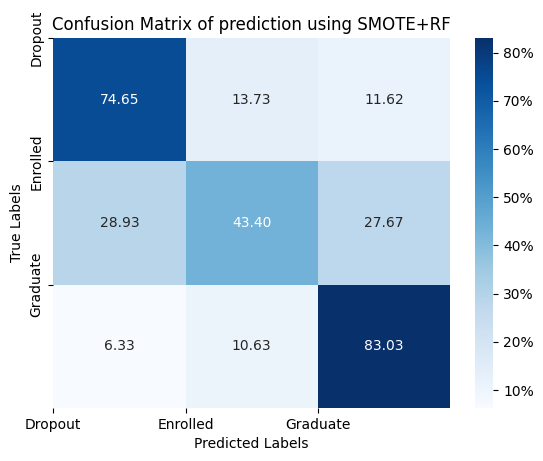

In [77]:


#Visualizing the confusion matrix from smote+RF model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using SMOTE+RF')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

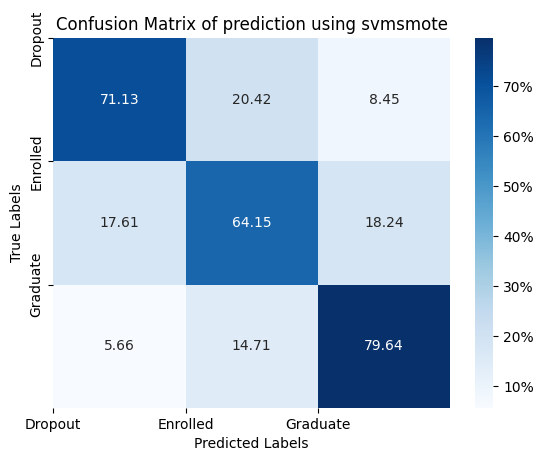

In [78]:


#Visualizing the confusion matrix from svmsmote model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_svmsmote)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using svmsmote')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

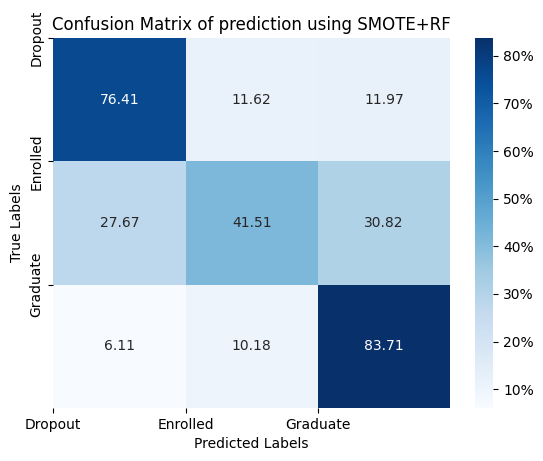

In [79]:


#Visualizing the confusion matrix from svmsmote + RF model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_svmsmote_rf)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using SMOTE+RF')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

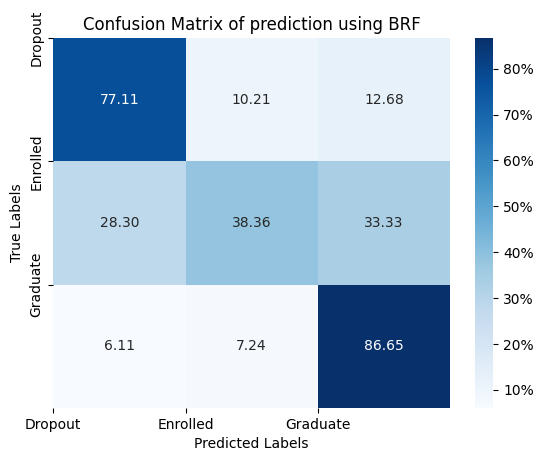

In [80]:


#Visualizing the confusion matrix from BRF model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_brf)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using BRF')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

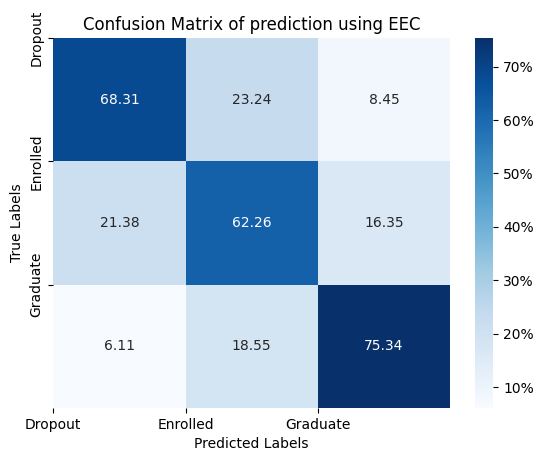

In [81]:


#Visualizing the confusion matrix from EEC model
#Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_eec)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis] * 100

#Creating a heatmap using the confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',cbar_kws={'format': '%.0f%%'})

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of prediction using EEC')
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])
plt.yticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

# Display the plot
plt.show()

In [82]:
compilations = {"Models": ["SMOTE + RF", "SVMSMOTE", "SVMSMOTE+RF", "BRF", "EEC"],
                "Train_F1_score": [0.97, 0.74, 0.98, 0.97, 0.75],
                "Test_set_F1_score": [0.73, 0.75, 0.73, 0.74, 0.72],
                "Test Accuracy": [0.73, 0.74, 0.74, 0.75, 0.71]}
frame = pd.DataFrame(compilations)
print("F1_scores evaluations")
frame.head()

F1_scores evaluations


,Models,Train_F1_score,Test_set_F1_score,Test Accuracy
0,SMOTE + RF,0.97,0.73,0.73
1,SVMSMOTE,0.74,0.75,0.74
2,SVMSMOTE+RF,0.98,0.73,0.74
3,BRF,0.97,0.74,0.75
4,EEC,0.75,0.72,0.71


In [83]:
compilations= {"Model": ["SMOTE + RF", "SVMSMOTE", "SVMSMOTE + RF", "BRF", "EEC"],
              "Graduate(2)": [0.83, 0.83, 0.83, 0.84, 0.81],
              "Enrolled(1)": [0.44, 0.53, 0.44, 0.43, 0.49],
              "Dropout(0)": [0.74, 0.75, 0.76, 0.76, 0.72]
              }
frame = pd.DataFrame(compilations)
print("F1 Scores of predicted class labels")
frame.head()

F1 Scores of predicted class labels


,Model,Graduate(2),Enrolled(1),Dropout(0)
0,SMOTE + RF,0.83,0.44,0.74
1,SVMSMOTE,0.83,0.53,0.75
2,SVMSMOTE + RF,0.83,0.44,0.76
3,BRF,0.84,0.43,0.76
4,EEC,0.81,0.49,0.72
